# Introdução ao Matplotlib

Matplotlib é uma biblioteca usada para criação de gráficos e visualizações de dados em Python.

### Instalando Matplotlib

Para instalar o Matplotlib, você pode usar o pip:

`pip install matplotlib`

A biblioteca também está disponível para instalação pelo canal principal do Anaconda:

`conda install matplotlib`

E através do canal da comunidade conda-forge:

`conda install -c conda-forge matplotlib`

### Importando Matplotlib

Para começar a usar o Matplotlib, você precisa importá-lo. É importante pontuar que a maioria dos utilitários de Matplotlib fica no submódulo `pyplot` e a convenção é importá-lo como plt:

In [2]:
import matplotlib.pyplot as plt

### Criando gráficos simples

##### 1. Gráfico de linha

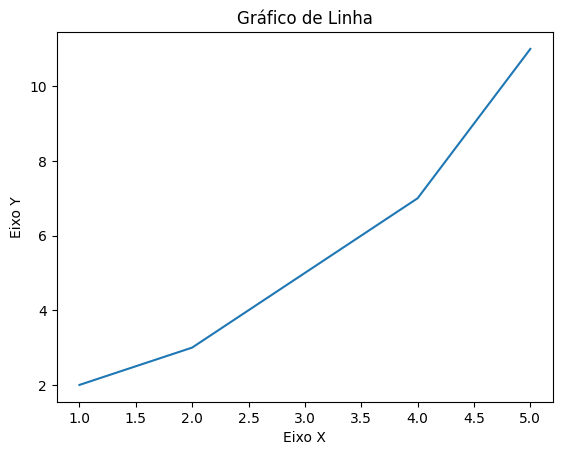

In [3]:
# Dados
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Criando o gráfico
plt.plot(x, y)

# Adicionando título e rótulos
plt.title('Gráfico de Linha')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Exibindo o gráfico
plt.show()

##### 2. Gráfico de barras

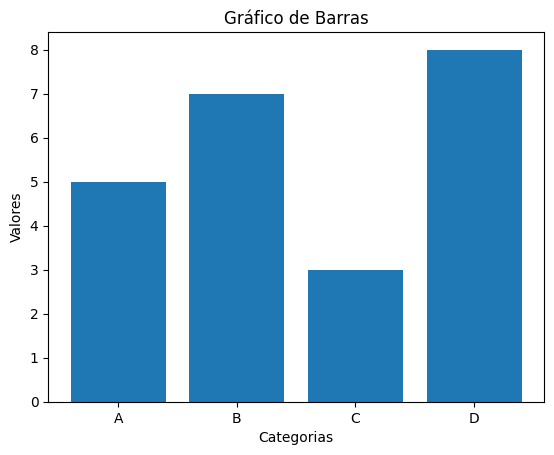

In [4]:
# Dados
categorias = ['A', 'B', 'C', 'D']
valores = [5, 7, 3, 8]

# Criando o gráfico de barras
plt.bar(categorias, valores)

# Adicionando título e rótulos
plt.title('Gráfico de Barras')
plt.xlabel('Categorias')
plt.ylabel('Valores')

# Exibindo o gráfico
plt.show()

##### 3. Gráfico de dipersão

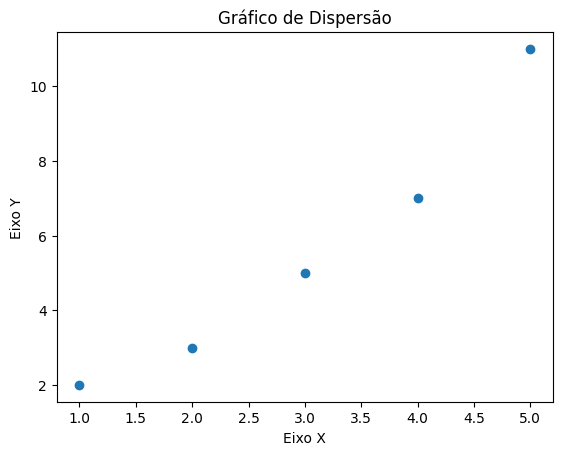

In [5]:
# Dados
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Criando o gráfico de dispersão
plt.scatter(x, y)

# Adicionando título e rótulos
plt.title('Gráfico de Dispersão')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Exibindo o gráfico
plt.show()

##### 4. Gráfico de pizza

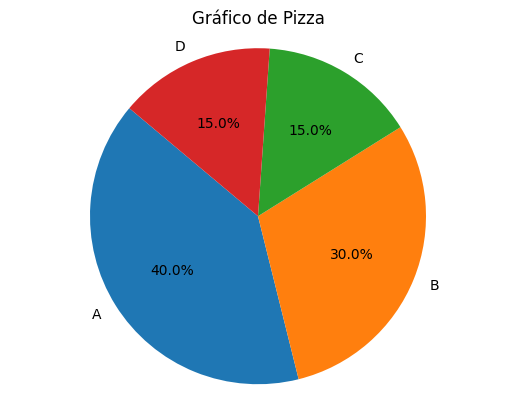

In [6]:
# Dados
categorias = ['A', 'B', 'C', 'D']
percentual = [40, 30, 15, 15]

# Criando o gráfico de pizza
plt.pie(percentual, labels=categorias, autopct='%1.1f%%', startangle=140)

# autopct: Formato para exibir as porcentagens nos setores
# startangle: Define a rotação inicial do gráfico

# Adicionando título
plt.title('Gráfico de Pizza')

# Exibindo o gráfico
plt.axis('equal') # Garante que o gráfico seja desenhado como um círculo
plt.show()

##### 5. Histograma

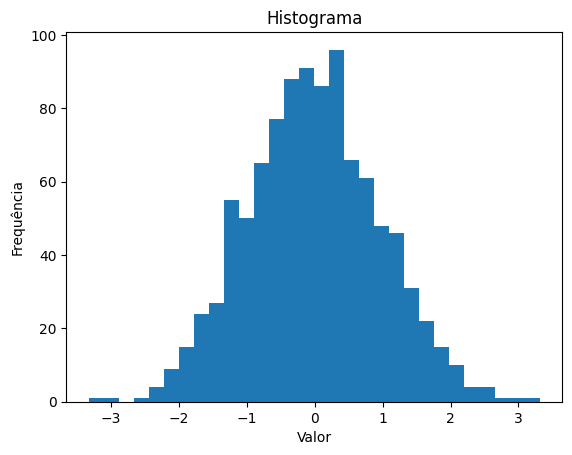

In [7]:
import numpy as np

# Gerando dados aleatórios
dados = np.random.randn(1000) # 1000 dados com distribuição normal

# Criando o histograma
plt.hist(dados, bins=30)

# Adicionando título e rótulos
plt.title('Histograma')
plt.xlabel('Valor')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

### Personalizando gráficos

É possível personalizar os gráficos ajustando diversos aspectos, como título e rótulo nos eixos, estilo de linhas e marcadores, cor, tamanho da figura e inclusão de grades para facilitar a leitura. Abaixo é apresentado um exemplo de como fazer alguns desses ajustes em um gráfico de linha.

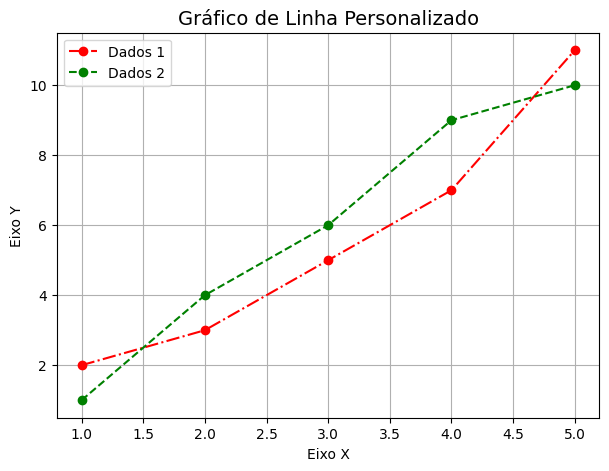

In [8]:
# Gráfico de Linha Personalizado
x = [1, 2, 3, 4, 5]
y1 = [2, 3, 5, 7, 11]
y2 = [1, 4, 6, 9, 10]

plt.figure(figsize=(7, 5)) # 7 de largura e 5 de altura
plt.plot(x, y1, color='red', marker='o', linestyle='-.', label='Dados 1')
plt.plot(x, y2, color='green', marker='o', linestyle='--', label='Dados 2')
plt.title('Gráfico de Linha Personalizado', fontsize=14)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend() # Adiciona legenda
plt.grid(True) # Adiciona grade
plt.show()

### Salvando gráficos

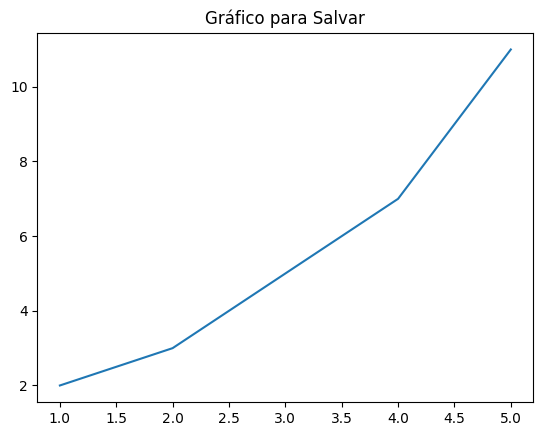

In [9]:
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.plot(x, y)
plt.title('Gráfico para Salvar')
plt.savefig('/content/grafico.png')  # Salva o gráfico como PNG
plt.show()

### Criando gráficos a partir de um conjunto de dados -- Séries temporais

Primeiramente, é necessário ler e organizar o conjunto de dados.

In [10]:
# Fazendo download de um conjunto de dados armazenado no GitHub
!curl -LJO https://raw.githubusercontent.com/labofis/labofis_tutoriais/refs/heads/main/dados_pirata.csv

import pandas as pd

df_pirata = pd.read_csv('/content/dados_pirata.csv')
df_pirata['datetime'] = pd.to_datetime(df_pirata['datahora'], utc=True)
df_pirata.index = df_pirata['datetime']
df_pirata = df_pirata.drop(['Unnamed: 0', 'datahora', 'datetime'], axis=1)

print(df_pirata)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1257  100  1257    0     0   3078      0 --:--:-- --:--:-- --:--:--  3080
                              s_1    t_1
datetime                                
2022-09-01 12:00:00+00:00  37.284  23.98
2022-09-02 12:00:00+00:00  37.308  24.07
2022-09-03 12:00:00+00:00  37.325  24.14
2022-09-04 12:00:00+00:00  37.320  24.17
2022-09-05 12:00:00+00:00  37.315  24.31
2022-09-06 12:00:00+00:00  37.324  24.13
2022-09-07 12:00:00+00:00  37.325  24.11
2022-09-08 12:00:00+00:00  37.328  24.09
2022-09-09 12:00:00+00:00  37.325  24.08
2022-09-10 12:00:00+00:00  37.332  24.12
2022-09-11 12:00:00+00:00  37.330  24.29
2022-09-12 12:00:00+00:00  37.343  24.36
2022-09-13 12:00:00+00:00  37.350  24.31
2022-09-14 12:00:00+00:00  37.350  24.30
2022-09-15 12:00:00+00:00  37.360  24.50
2022-09-16 12:00:00+00:00  37.350  24.78
2022-09-17 12:00:00+00:00

##### 1. Gráfico de série temporal simples

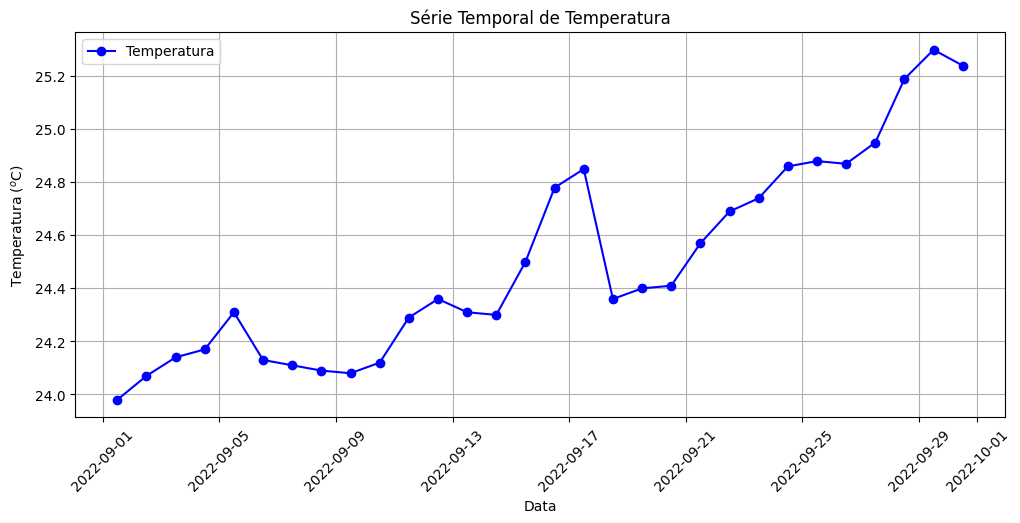

In [11]:
# Temperatura
plt.figure(figsize=(12, 5))
plt.plot(df_pirata.index, df_pirata['t_1'], marker='o', color='b', label='Temperatura')
plt.title('Série Temporal de Temperatura')
plt.xlabel('Data')
plt.ylabel('Temperatura (${^o}$C)')
plt.xticks(rotation=45) # Rotaciona o rótulo do eixo x 45º
plt.grid()
plt.legend()
plt.show()

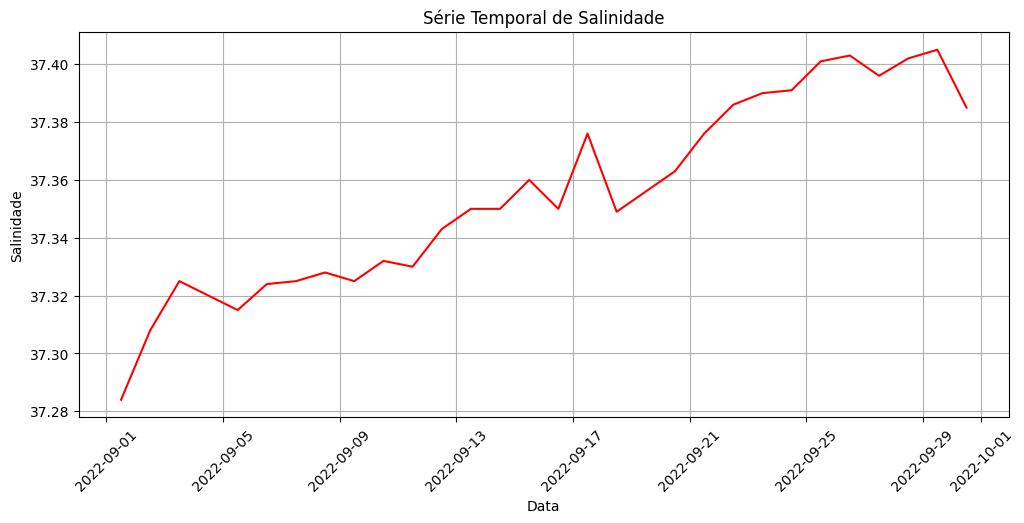

In [12]:
# Salinidade
plt.figure(figsize=(12, 5))
plt.plot(df_pirata.index, df_pirata['s_1'], color='r')
plt.title('Série Temporal de Salinidade')
plt.xlabel('Data')
plt.ylabel('Salinidade')
plt.xticks(rotation=45) # Rotaciona o rótulo do eixo x 45º
plt.grid()
plt.show()

##### 2. Gráfico de séries temporais utilizando dois eixos y

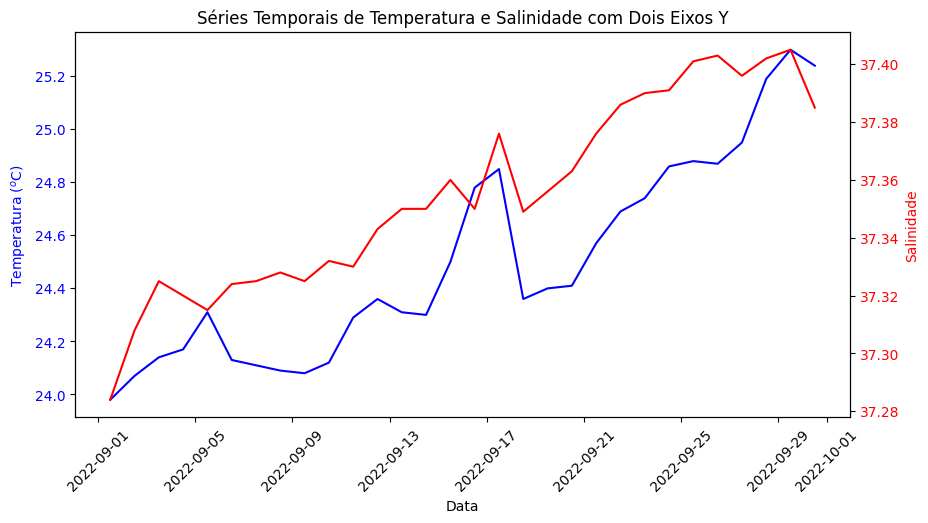

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Série temporal de temperatura
ax1.plot(df_pirata.index, df_pirata['t_1'], color='b')
ax1.set_xlabel('Data')
ax1.set_ylabel('Temperatura (${^o}$C)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=45)

# Criando um segundo eixo y para a salinidade no mesmo plot
ax2 = ax1.twinx()
ax2.plot(df_pirata.index, df_pirata['s_1'], color='r')
ax2.set_ylabel('Salinidade', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Séries Temporais de Temperatura e Salinidade com Dois Eixos Y')
plt.show()

##### 3. Gráficos de séries temporais utilizando a função `subplot`

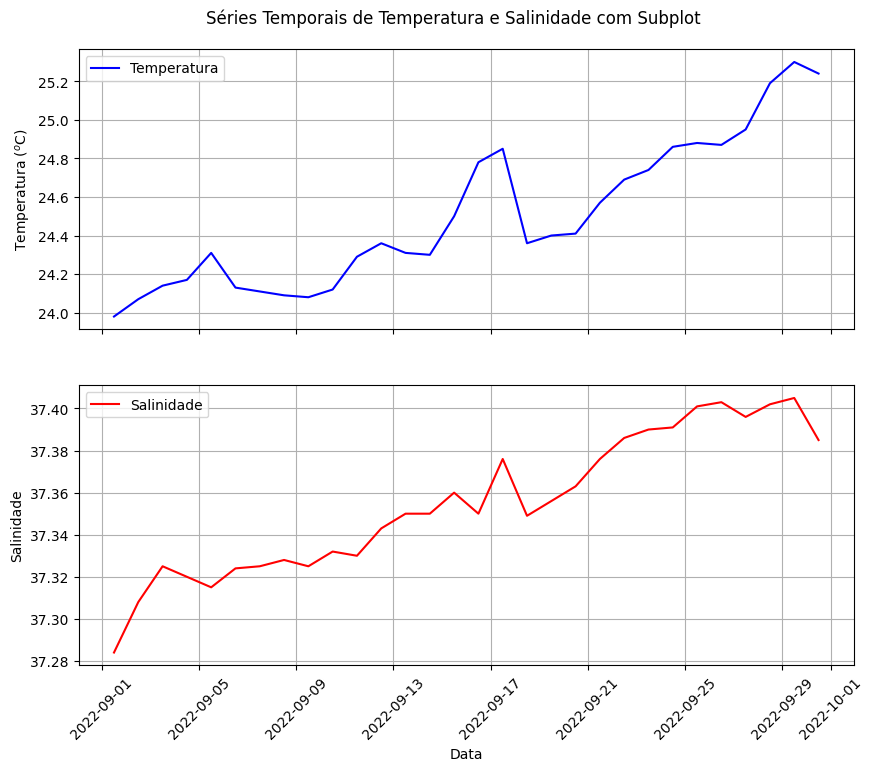

In [14]:
# Criando uma figura com dois plots, utilizando a função subplot
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(2,1,1) # 2 linhas, 1 coluna e 1ª posição
ax2 = fig.add_subplot(2,1,2, sharex = ax1) # 2 linhas, 1 coluna e 2ª posição
                                           # sharex = ax1 -- compartilha os limites do eixo x com o primeiro plot

plt.subplots_adjust(hspace=0.2) # Ajusta a altura entre os subplots


# Primeiro plot: Série temporal de temperatura
ax1.plot(df_pirata.index, df_pirata['t_1'], color='b', label='Temperatura')
ax1.set_ylabel('Temperatura (${^o}$C)')
ax1.grid()
ax1.legend()
plt.setp(ax1.get_xticklabels(), visible=False) # Remove o rótulo do eixo x


# Segundo plot: Série temporal de salinidade
ax2.plot(df_pirata.index, df_pirata['s_1'], color='r', label='Salinidade')
ax2.set_xlabel('Data')
ax2.set_ylabel('Salinidade')
ax2.grid()
ax2.legend()

fig.suptitle('Séries Temporais de Temperatura e Salinidade com Subplot', y=0.93, fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Criando gráficos a partir de um conjunto de dados -- Dados geoespaciais

Primeiramente, é necessário ler e organizar o conjunto de dados.

In [15]:
# Fazendo download de um conjunto de dados armazenado no GitHub
!curl -LJO https://raw.githubusercontent.com/labofis/labofis_tutoriais/refs/heads/main/dados_gebco.nc

import xarray as xr

ds_gebco = xr.open_dataset('/content/dados_gebco.nc')

lat=ds_gebco.lat.data
lon=ds_gebco.lon.data
Lon,Lat=np.meshgrid(lon,lat)
z=ds_gebco.elevation.data

print(ds_gebco)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.0M  100 10.0M    0     0  9247k      0  0:00:01  0:00:01 --:--:-- 9252k
<xarray.Dataset> Size: 11MB
Dimensions:    (lat: 1680, lon: 3120)
Coordinates:
  * lat        (lat) float64 13kB -27.0 -26.99 -26.99 ... -20.01 -20.01 -20.0
  * lon        (lon) float64 25kB -48.0 -47.99 -47.99 ... -35.01 -35.01 -35.0
Data variables:
    elevation  (lat, lon) int16 10MB -69 -69 -69 -70 ... -4139 -4139 -4140 -4141
Attributes: (12/36)
    title:                           The GEBCO_2023 Grid - a continuous terra...
    summary:                         The GEBCO_2023 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    naming_authority:            

##### 1. Gráficos geoespaciais utilizando as funções `contour` e `contourf`

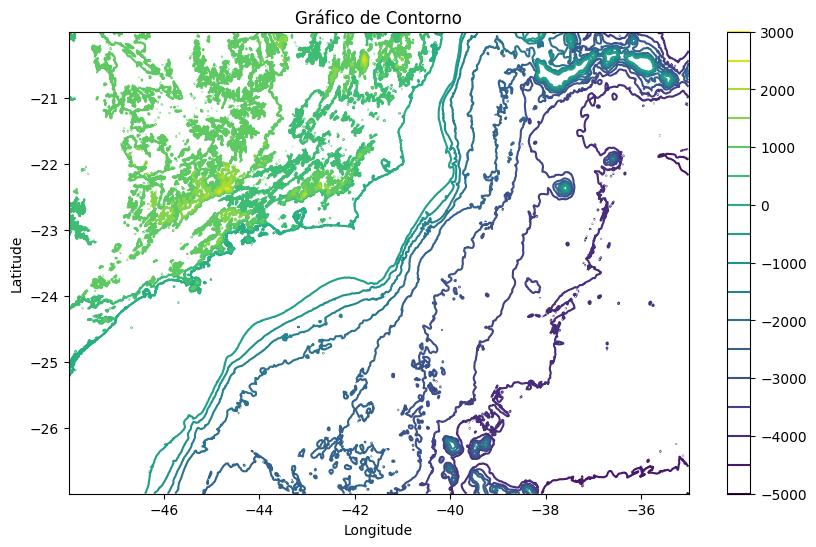

In [16]:
# Plotando contorno
plt.figure(figsize=(10, 6))
contour = plt.contour(Lon, Lat, z, levels=15, cmap='viridis')
plt.colorbar(contour)
plt.title('Gráfico de Contorno')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

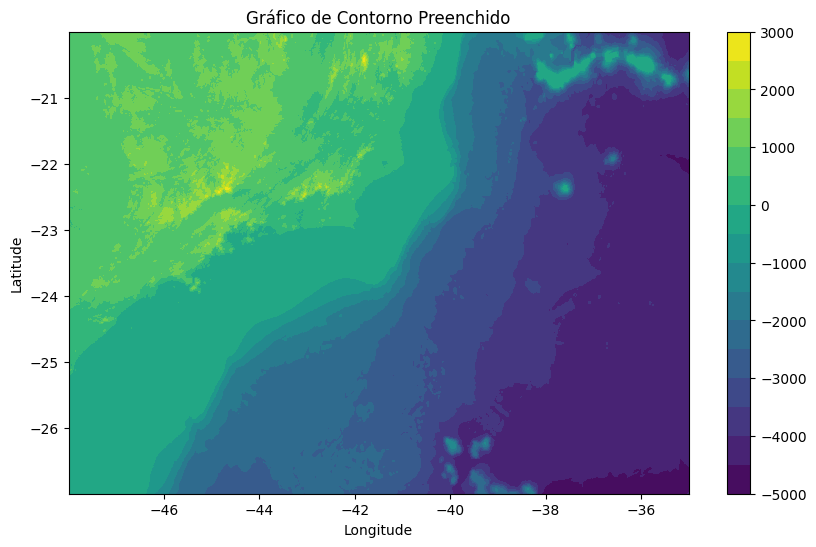

In [17]:
# Plotando contorno preenchido
plt.figure(figsize=(10, 6))
contourf = plt.contourf(Lon, Lat, z, levels=15, cmap='viridis')
plt.colorbar(contourf)
plt.title('Gráfico de Contorno Preenchido')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

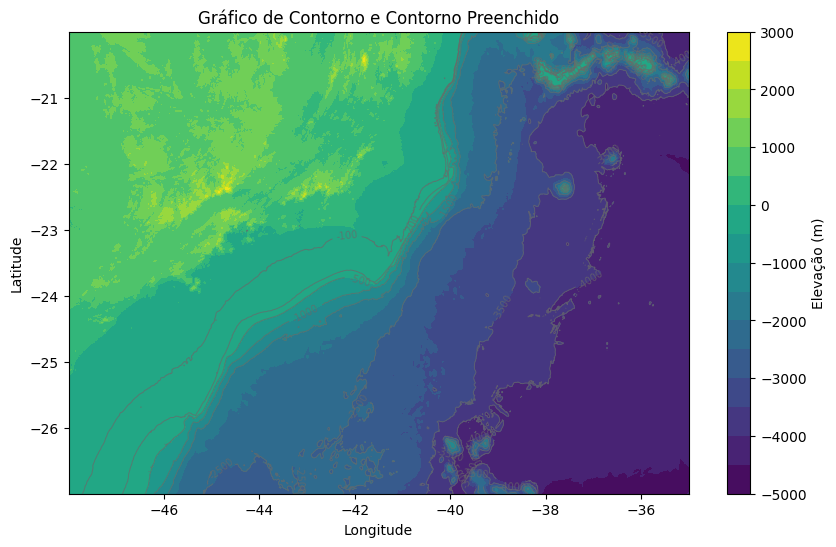

In [18]:
# Plotando contour e contourf no mesmo gráfico
plt.figure(figsize=(10, 6))

cf = plt.contourf(Lon, Lat, z, levels=15, cmap='viridis')
cb = plt.colorbar(cf)
cb.set_label('Elevação (m)')

cr = plt.contour(Lon, Lat, z, [-4000, -3500, -2500, -1500,-1000,-500, -200, -100], colors='dimgray', linestyles='-',
            linewidths=0.7, alpha=0.7)
plt.clabel(cr, fontsize=7, fmt='%1.0f')

plt.title('Gráfico de Contorno e Contorno Preenchido')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

### Conclusão

Esses são conceitos básicos para começar a usar a biblioteca Matplotlib. Com esses exemplos, você já deve ser capaz criar diferentes tipos de gráficos. Experimente modificar os dados e as configurações dos gráficos para se familiarizar ainda mais com a biblioteca. Para mais informações, recomenda-se consultar a [documentação oficial do Matplotlib](https://matplotlib.org/stable/index.html).
